In [ ]:
!pip install "opencv-python-headless<4.3"
!pip install cellpose
!pip install stardist


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 26.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.3.1 requires opencv-python-headless>=4.1.1, but you have opencv-python-headless 3.4.18.65 which is incompatible.
qudida 0.0.4 requires opencv-python-headless>=4.0.1, but you have opencv-python-headless 3.4.18.65 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
!nvcc --version
!nvidia-smi

import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
Mon Dec 11 23:36:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |       

In [ ]:
# from tifffile import imread

# def load_splice(mask, input):
#     X = list(glob(mask+'/*.tif'))
#     Y = list(glob(input+'/*.tif'))

#     X = list(map(imread,X))
#     Y = list(map(imread,Y))

#     X = slice_numpy_array_list(X)
#     Y = slice_numpy_array_list(Y)
#     return X, Y



# def slice_numpy_array_list(array_list):
#     sliced_arrays = []

#     for image_array in array_list:
#         height, width = image_array.shape

#         crop_size = 144
#         stride = crop_size

#         for row in range(0, height, stride):
#             for col in range(0, width, stride):
#                 upper = row
#                 left = col
#                 lower = min(row + crop_size, height)
#                 right = min(col + crop_size, width)

#                 subarray = image_array[upper:lower, left:right]
#                 subarray_height, subarray_width = subarray.shape

#                 if subarray_height == crop_size and subarray_width == crop_size:
#                     # Only append if the subarray is exactly 144x144
#                     sliced_arrays.append(subarray)

#     return sliced_arrays


In [ ]:
from cellpose import io

#X, Y = load_splice("/content/drive/MyDrive/MLP2/masks", "/content/drive/MyDrive/MLP2/inputs")
dir = "/content/drive/MyDrive/MLP2/cp_validate_focus"
files = io.get_image_files(dir, '_mask')
print(files)
images = [io.imread(f) for f in files]
maskdir = "/content/drive/MyDrive/MLP2/cp_validate_focus_masks"
gtfiles = io.get_image_files(maskdir, '')
print(gtfiles)
gt = [io.imread(m) for m in gtfiles]

#here is where you load each model
model_path = "/content/drive/MyDrive/MLP2/MODEL_LR1_E10/CP_lr1_e10_hl1"


model = models.CellposeModel(gpu=True, pretrained_model=model_path)


#we can probably finetune here too

flow_threshold = 0.4
cellprob_threshold = 0

diameter = model.diam_labels
print(diameter)

#running model on our images

masks, flows, styles = model.eval(images,
                                  channels = [0,0], #grayscale
                                  diameter = diameter,
                                  flow_threshold= flow_threshold,
                                  cellprob_threshold=cellprob_threshold)



print(len(masks))
print(len(gt))

['/content/drive/MyDrive/MLP2/cp_validate_focus/focus_0_0.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus/focus_0_400.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus/focus_0_800.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus/focus_400_0.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus/focus_400_400.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus/focus_400_800.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus/focus_800_0.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus/focus_800_400.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus/focus_800_800.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus/focus_1200_0.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus/focus_1200_400.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus/focus_1200_800.tif']
['/content/drive/MyDrive/MLP2/cp_validate_focus_masks/focus_0_0_mask.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus_masks/focus_0_400_mask.tif', '/content/drive/MyDrive/MLP2/cp_validate_focus_masks/fo

In [1]:
# attempt at using matching dataset from stardist..
# metrics dont look that great but maybe they are true :(
from stardist.plot import render_label
from stardist.matching import matching, matching_dataset
from tqdm import tqdm

taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
stats = [matching_dataset(gt, masks, thresh=t, show_progress=False) for t in tqdm(taus)] # we can also compare with the augmentated image
stats[taus.index(0.1)]

ModuleNotFoundError: ignored

In [ ]:
#this saves the predicted masks into _seg.npy files
io.masks_flows_to_seg(images,
                      masks,
                      flows,
                      diameter*np.ones(len(masks)),
                      files,
                      [0, 0])

In [ ]:
#I can also save it as png, and tif
io.save_masks(images,
              masks,
              flows,
              files,
              channels=[0, 0],
              png=True, # save masks as PNGs and save example image
              tif=True, # save masks as TIFFs
              save_txt=False, # save txt outlines for ImageJ
              save_flows=False, # save flows as TIFFs
              save_outlines=False, # save outlines as TIFFs
              )

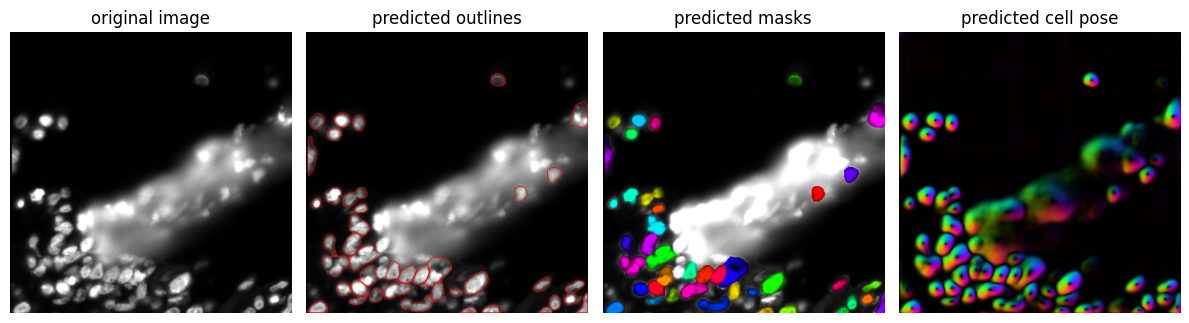

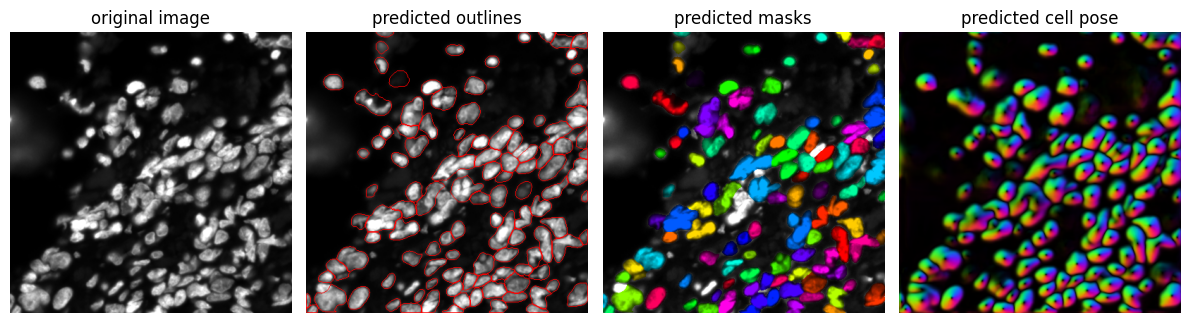

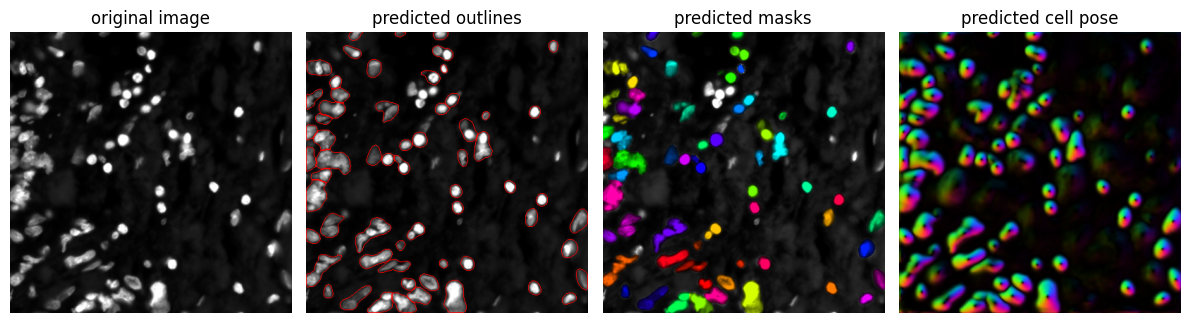

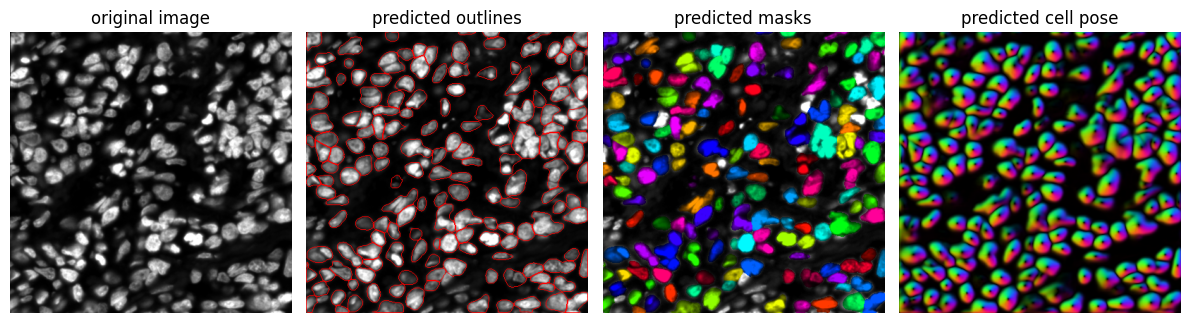

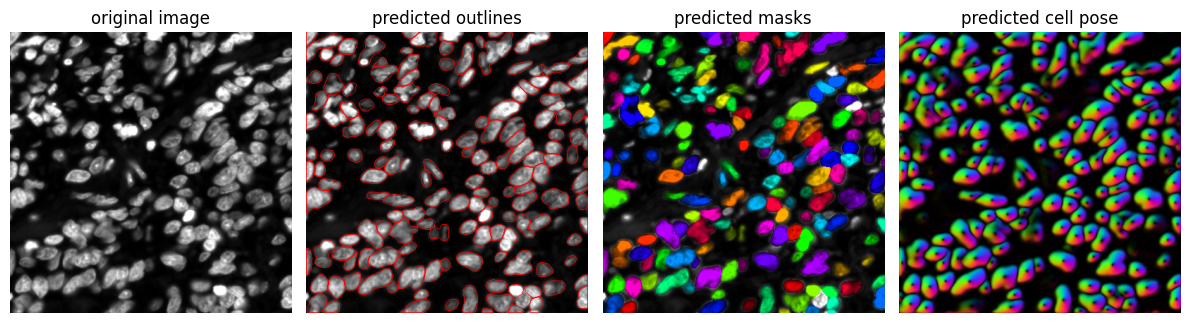

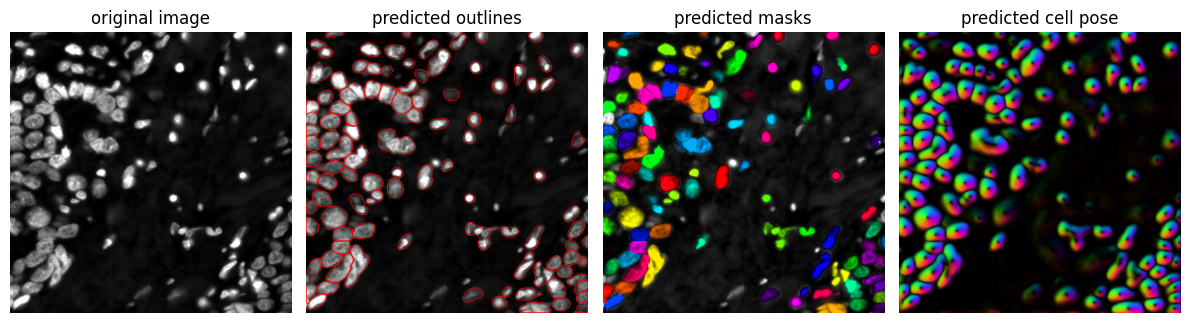

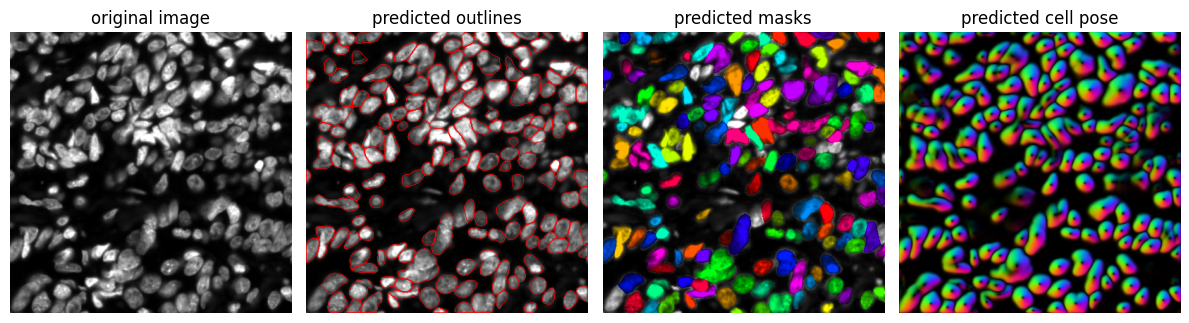

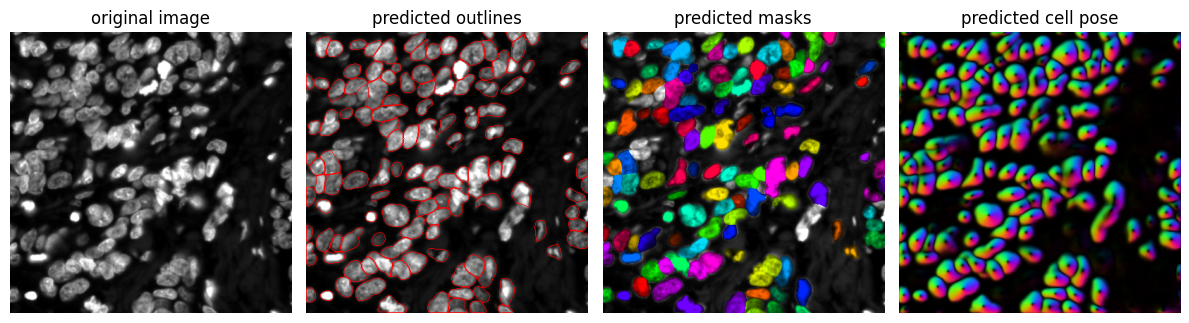

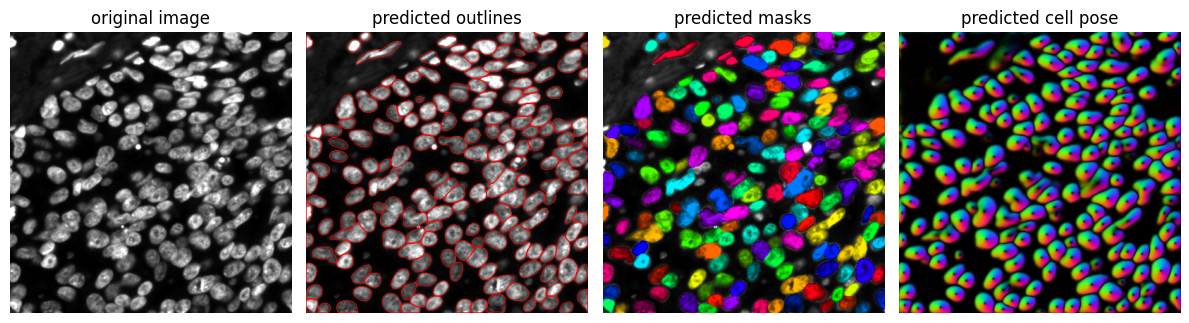

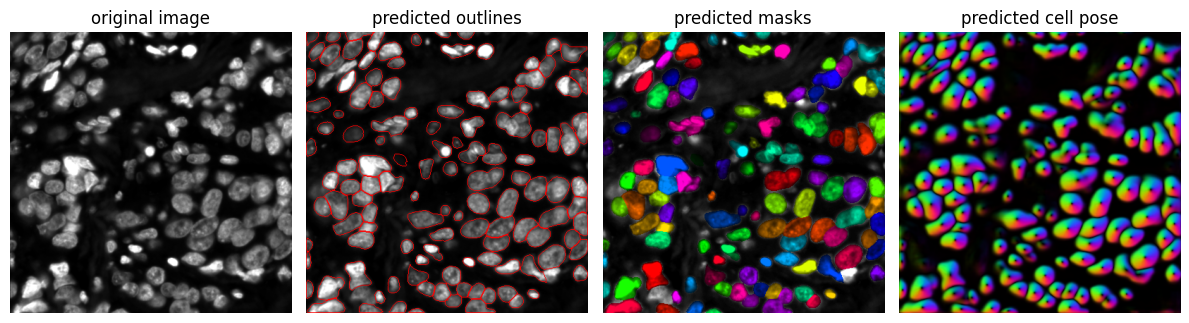

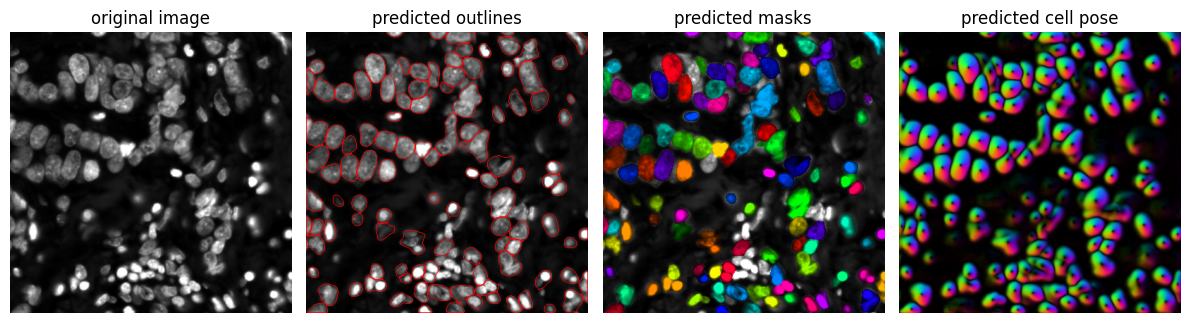

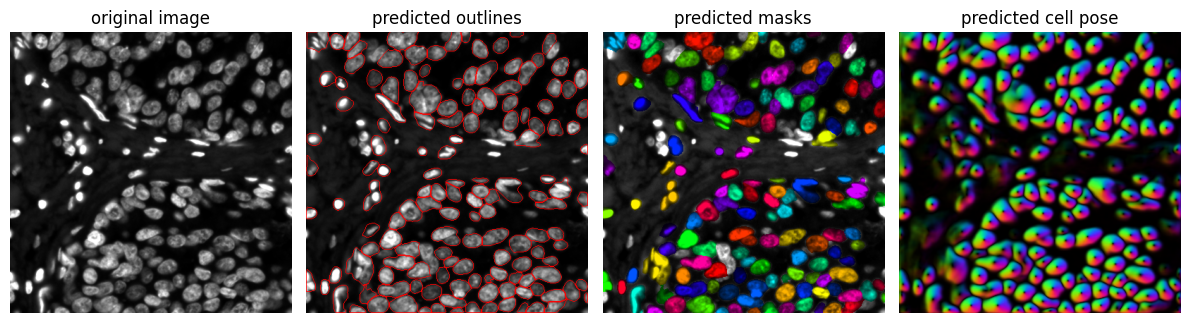

In [ ]:
from cellpose import plot

nimg = len(images)
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, images[idx], maski, flowi)
    plt.tight_layout()
    plt.show()

In [ ]:
def display_masks(ground_truth, predicted_mask):


    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the ground truth mask
    axes[0].imshow(ground_truth, cmap='gray')
    axes[0].set_title('Ground Truth Mask')

    # Display the predicted mask
    axes[1].imshow(predicted_mask, cmap='gray')
    axes[1].set_title('Predicted Mask')

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

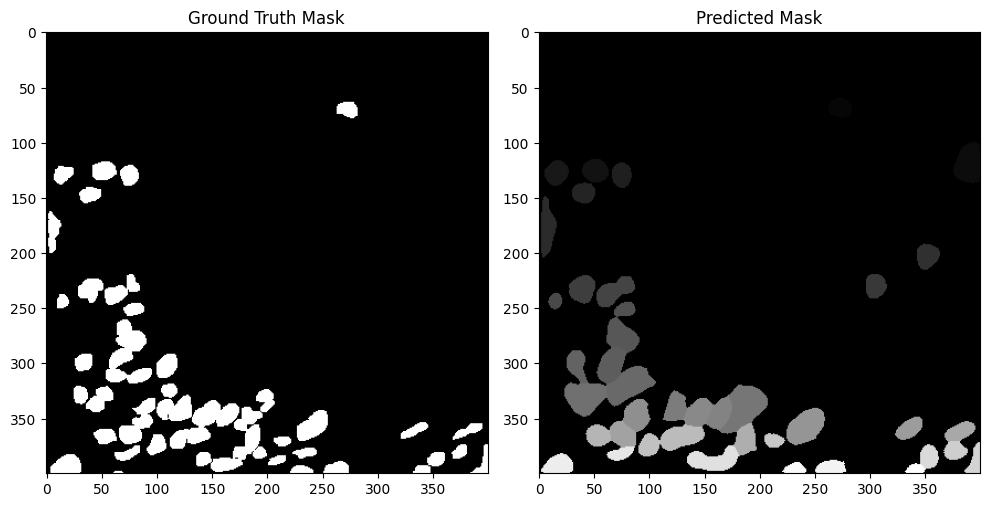

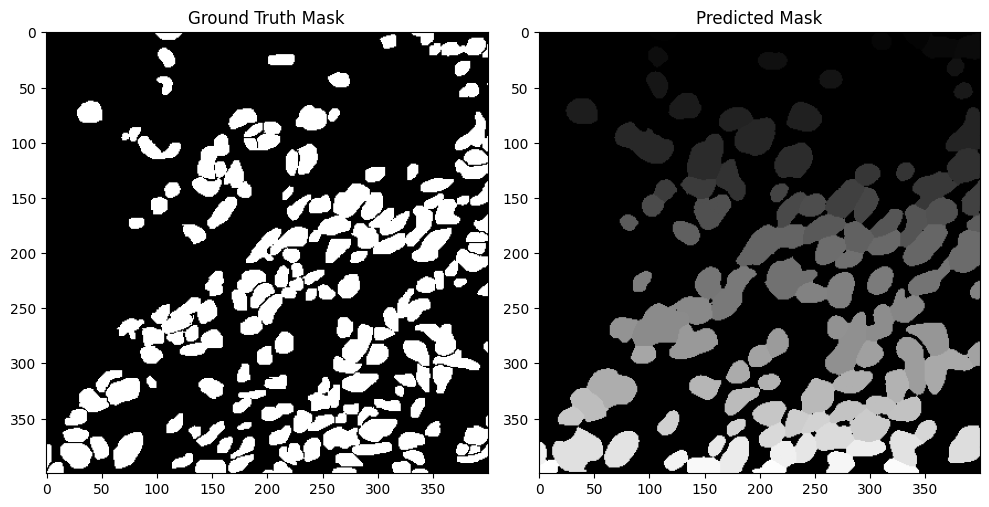

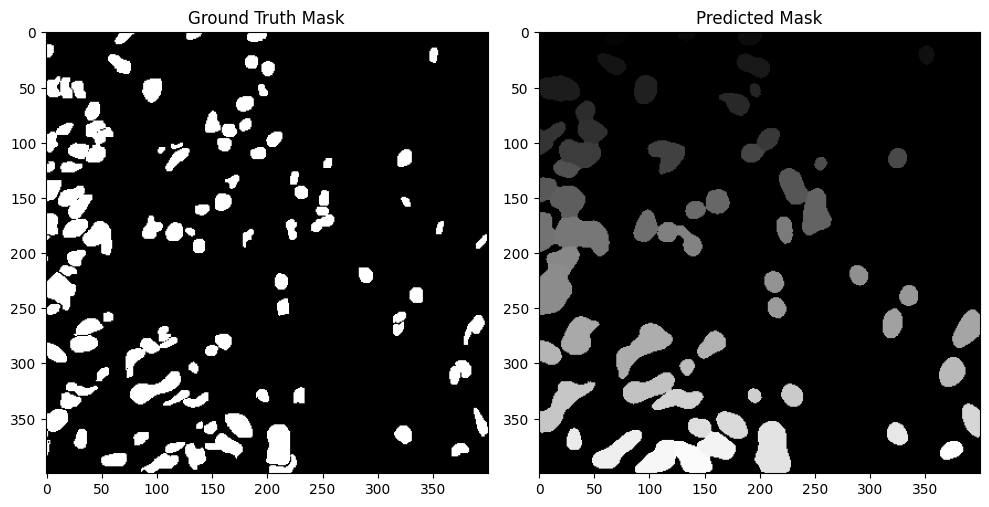

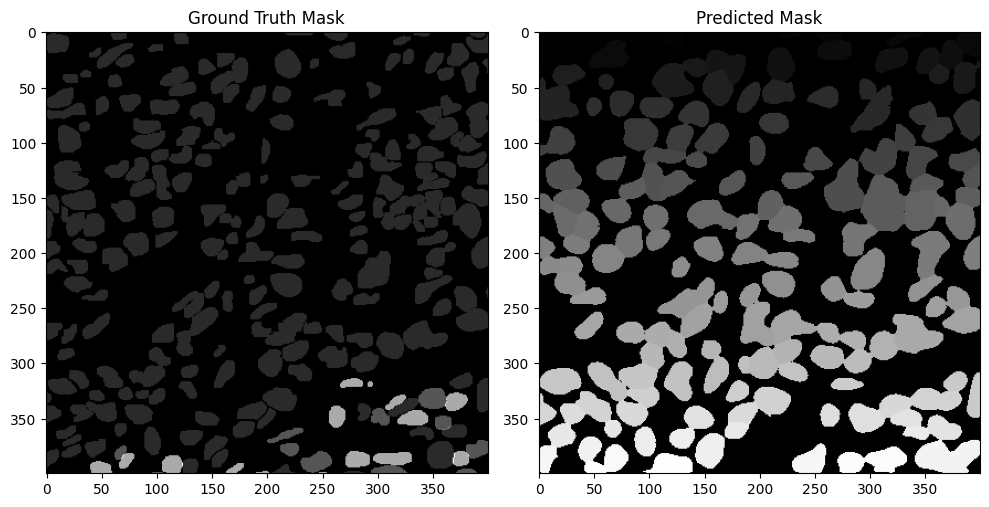

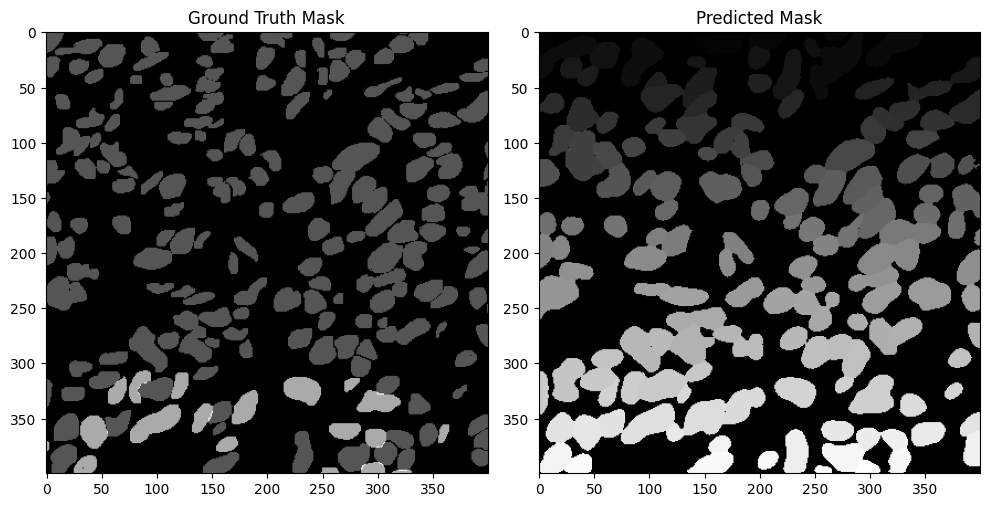

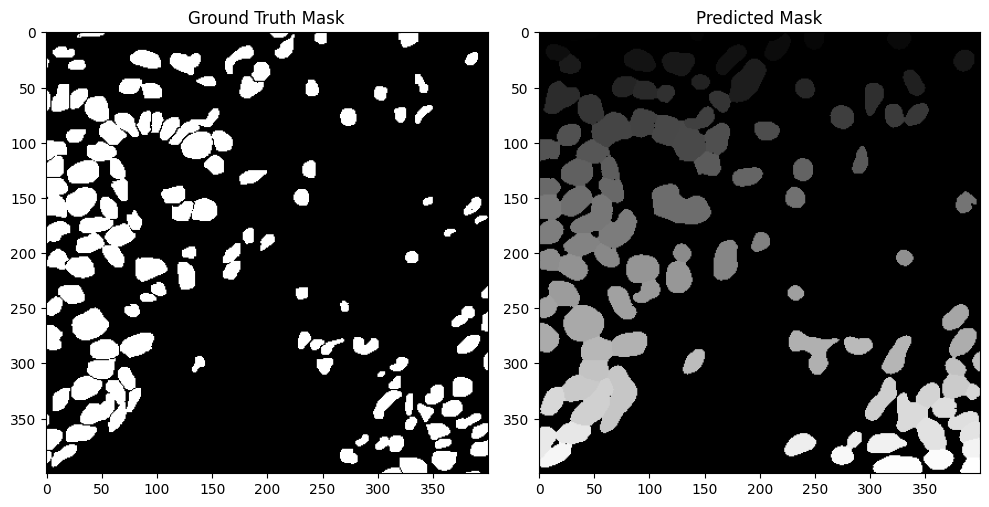

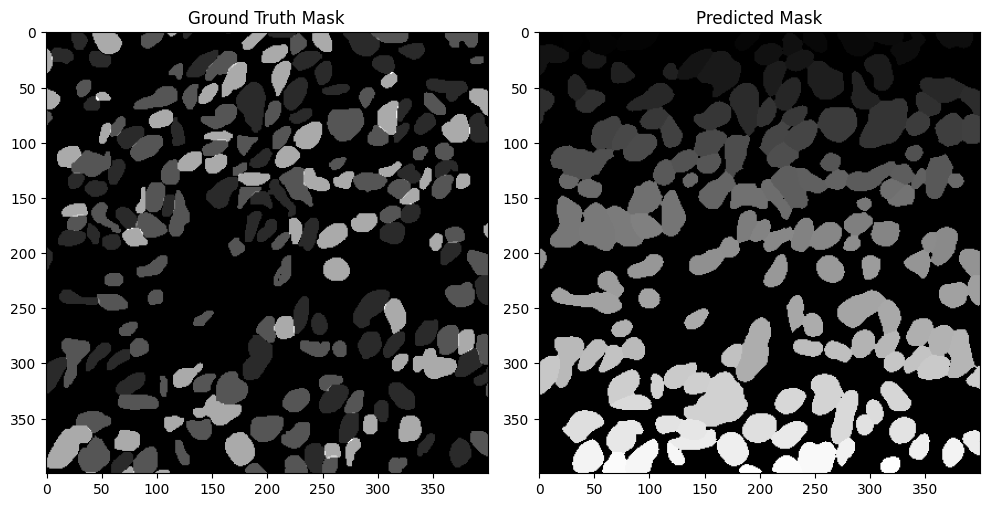

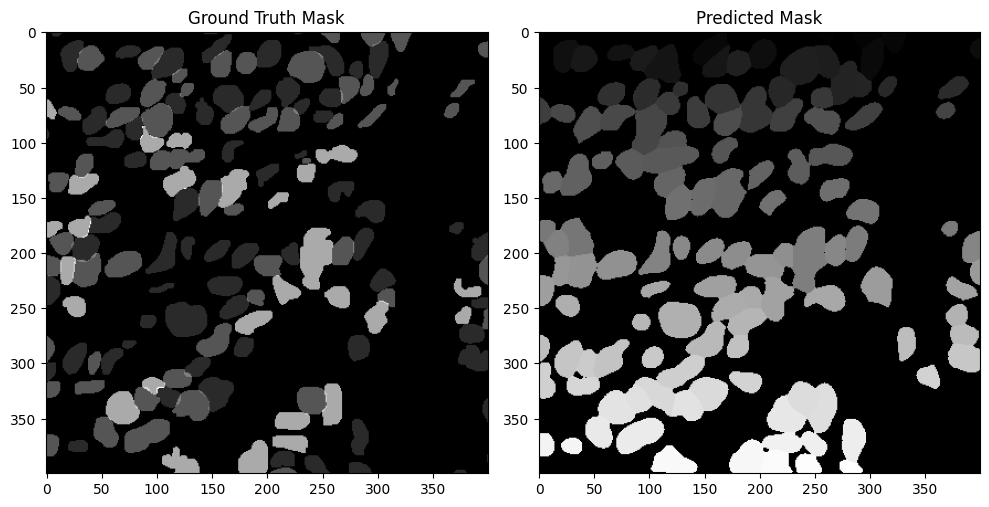

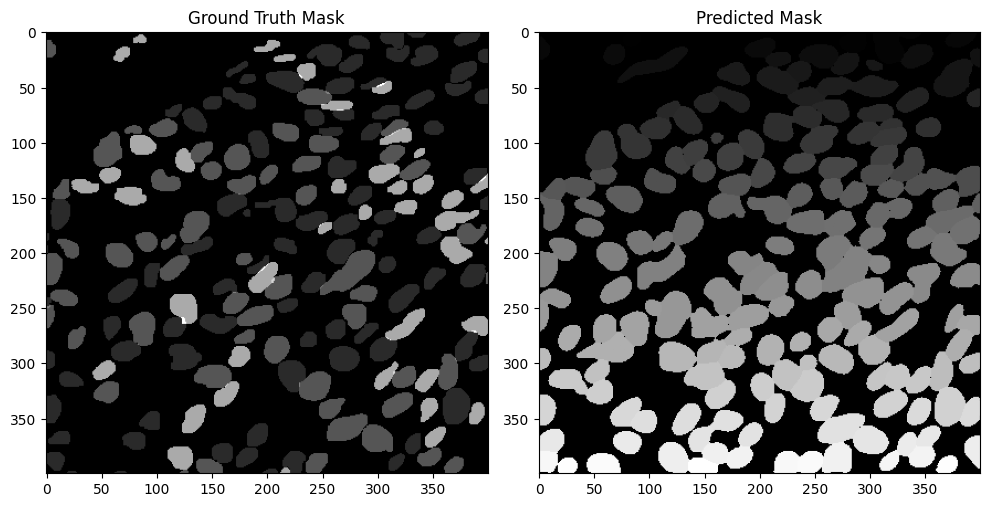

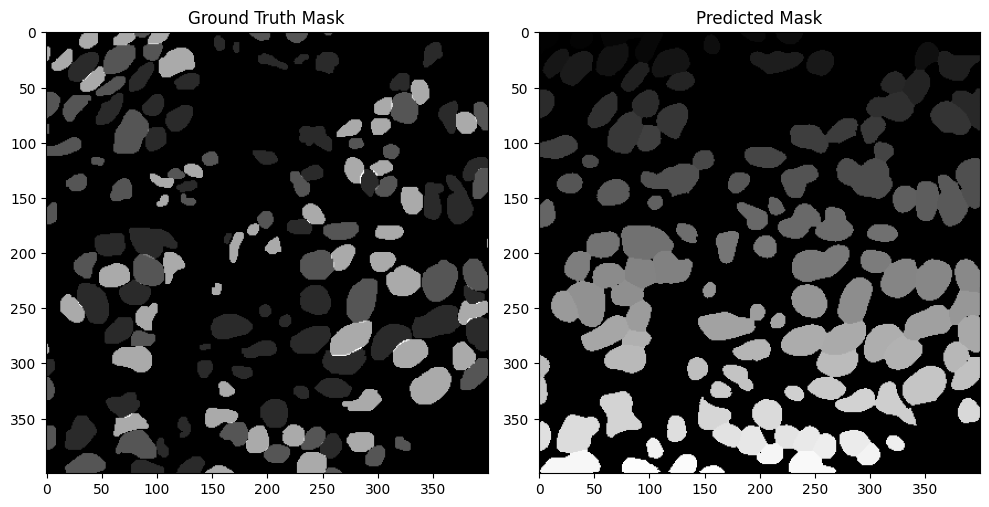

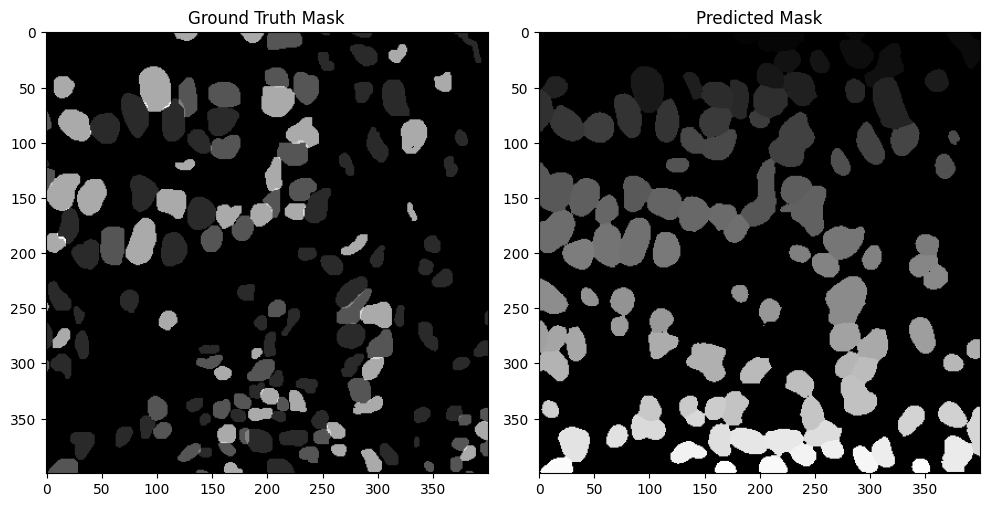

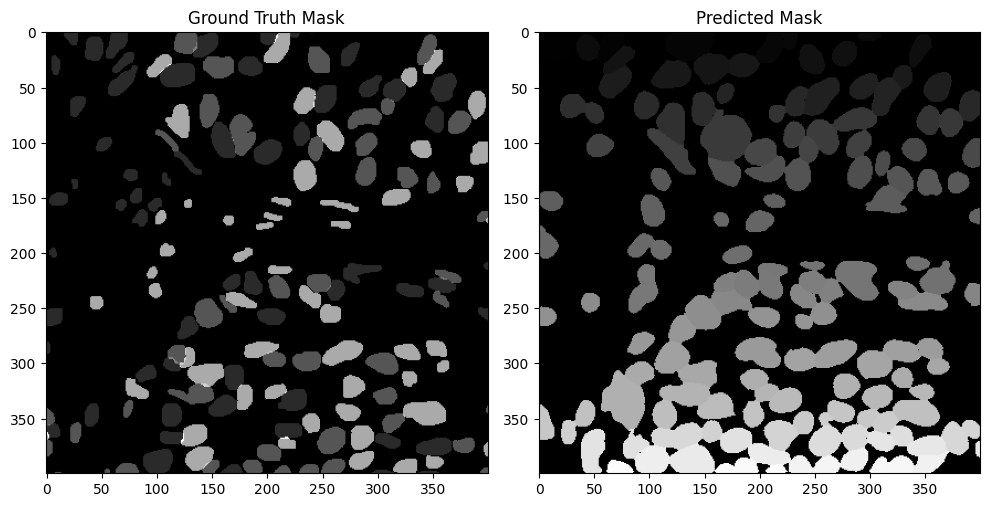

In [ ]:
for i, img in enumerate(gt):
  display_masks(img, masks[i])

In [ ]:
from cellpose import metrics
import matplotlib.pyplot as plt

#IM trying to conpute some useful metrics for my segmentation...

t = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


ap, tp, fp, fn = metrics.average_precision(gt, masks, t)

# # Plot average precision and recall with thresholds on the x-axis
# def plot_precision_recall_curve(ap, threshold):
#     plt.figure(figsize=(8, 6))
#     for i in range(len(ap)):
#         plt.plot(threshold, ap[i], label=f'Mask {i + 1}')

#     plt.title('Average Precision vs Threshold')
#     plt.xlabel('Threshold')
#     plt.ylabel('Average Precision')
#     plt.legend()
#     plt.show()


# plot_precision_recall_curve(ap, t)

In [ ]:
print(len(stats[0]))
print(len(stats[0][0]))
print(stats[0][0])

12
9
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
